In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("./Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = dataset.iloc[:, 1:-1]  # 選取除最後一列以外的所有列
X.head()

,Level
0,1
1,2
2,3
3,4
4,5


In [4]:
y = dataset.iloc[:, -1].to_frame() # 選取最後一列作為y
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


## Training the Random Forest Regression model

In [5]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(
    n_estimators = 10, # 指定隨機森林中包含的決策樹數量 (10 棵樹)
    # random_state = 0 # 隨機數生成種子
    )
regressor.fit(X, y)

c:\Users\33313\.conda\envs\openai\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10)

In [6]:
regressor.predict([[6.5]])

c:\Users\33313\.conda\envs\openai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([159000.])

c:\Users\33313\.conda\envs\openai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


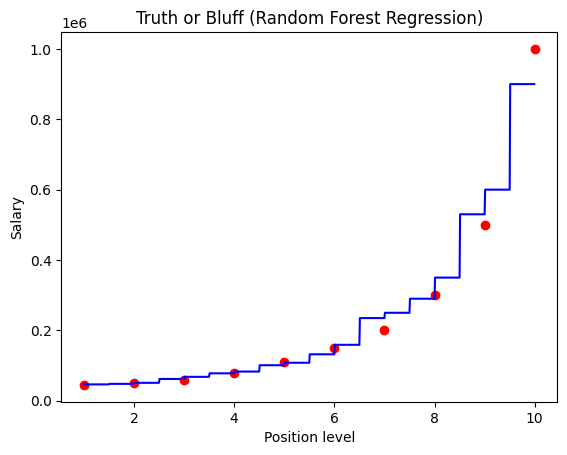

In [8]:
X = X['Level'].to_numpy()  # DataFrame轉為 NumPy 陣列
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()